<a href="https://colab.research.google.com/github/sautrikc/Bank-Campaign/blob/main/Bank_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the success of a bank marketing campaign

This notebook predicts the success of a bank marketing campaign. The data has been obtained from https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set . The program has been divided into two sections : EDA and the ML algorithm.

## Preprocessing and EDA

### 1. Importing important libraries

In [ ]:
import numpy as np                           #For calculations
import matplotlib.pyplot as plt              #For making graphs
import pandas as pd                          #For operations on dataframes                    
import seaborn as sns                        #For making graphs with better visualizations                

### 2. Reading the data

In [ ]:
df=pd.read_csv('bank-full.csv',sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26282,33,blue-collar,married,primary,no,5151,yes,yes,cellular,20,nov,73,1,178,4,failure,no
7373,34,management,married,tertiary,no,581,yes,no,unknown,29,may,182,1,-1,0,unknown,no
7031,41,services,married,secondary,no,803,yes,no,unknown,28,may,88,3,-1,0,unknown,no
40106,29,admin.,single,tertiary,no,261,no,no,cellular,4,jun,66,1,79,19,failure,no
8423,39,unemployed,married,secondary,no,0,yes,no,unknown,3,jun,73,1,-1,0,unknown,no
6322,30,entrepreneur,married,secondary,no,1539,yes,yes,unknown,27,may,166,9,-1,0,unknown,no
31748,43,blue-collar,married,secondary,no,1617,yes,no,cellular,7,apr,239,1,-1,0,unknown,no
33820,24,student,single,tertiary,no,3415,no,no,cellular,27,apr,97,1,-1,0,unknown,yes
4447,32,blue-collar,married,primary,no,0,yes,no,unknown,20,may,142,1,-1,0,unknown,no
38548,29,blue-collar,married,secondary,no,25,yes,no,cellular,15,may,50,5,-1,0,unknown,no


The **feature** variables in the dataset include:

1.   age (Age): Indicates th age of the person
2.   job (Job): Indicates the profession of the person
3. marital (Marital Status): Indicates if the person is married.
4. education (Educational Level): Indicates the educational qualification of the person
5. default (Default status): Indicates if the person has credit in default.
6.  balance (Balance): Indicates the bank balance
7.  housing (Housing Loan Status): Indicates if the person has a housing loan
8. loan (Personal Loan Status): Indicates if the person has a personal loan
9. contact (Mode of contact): Indicates the mode of contact
9. day (Last contact day): Indicates the last contact day of the week
10. month (Last contact month): Indicates the last contact month of the year
11. duration (Last contact duration): Indicates the duration of the last contact in seconds
12. campaign (Number of contacts): Indicates the number of contacts performed during this campaign and for this client 
13. pdays (Number of days that passed by after the client was last contacted from a previous campaign)
14. previous (Number of contacts performed before this campaign and for this client)
15. poutcome (Outcome of the previous marketing campaign)

The **target** variable is y.



### 3. Preprocessing the data

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no missing values in the data. However, there are quite a few 'unknown'. We remove the rows that contain such values.

#### 3.a. Removing missing ('unknown/other') values

In [ ]:
# Deleting the rows in which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df2 = df.drop(df[condition].index, axis = 0, inplace = False)

In [ ]:
# Deleting rows in which column 'education' and 'job' contains 'unknown'
col = ['education','job']
for column in col:
  condition = df2[column] == 'unknown'
  df2 = df2.drop(df2[condition].index, axis = 0)

#### 3.b Removing outliers in continous data

In [ ]:
# Removing outliers based on zscore > 3 or zscore < -3
from scipy.stats import zscore

df2['balance_outliers'] = df2['balance']
df2['balance_outliers']= zscore(df2['balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that

condition = (df2['balance_outliers']>3) | (df2['balance_outliers']<-3 )
df2 = df2.drop(df2[condition].index, axis = 0)

In [ ]:
df3=df2.drop('balance_outliers',axis=1)

#### 3.d. Other transformations

In [ ]:
# Changing the y column to binary

df4=pd.get_dummies(df3,columns=['y'])  #Performing one hot encoding and removing one y_no column
df4.drop('y_no',axis=1,inplace=True)
df4=df4.rename(columns={'y_yes':'response'})
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0


In [ ]:
# Dropping column 'contact' which is not useful
df4.drop('contact',axis=1,inplace=True)

In [ ]:
#Converting 'duration' to minutes
df4['duration'] = df4['duration'].apply(lambda n:n/60).round(2)
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [ ]:
#Encoding months to integers
df4['month'] = df4['month'].replace(to_replace=['jan','feb','mar','apr','may',
                                              'jun','jul','aug','sep','oct','nov','dec']
                                  , value=['1', '2','3','4','5','6','7','8','9',
                                           '10','11','12'])
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


In [ ]:
# Dropping rows with duration <5s
condition = (df4['duration']<5/60)
df5 = df4.drop(df4[condition].index, axis = 0)

### 4. Exploratory Data Analysis

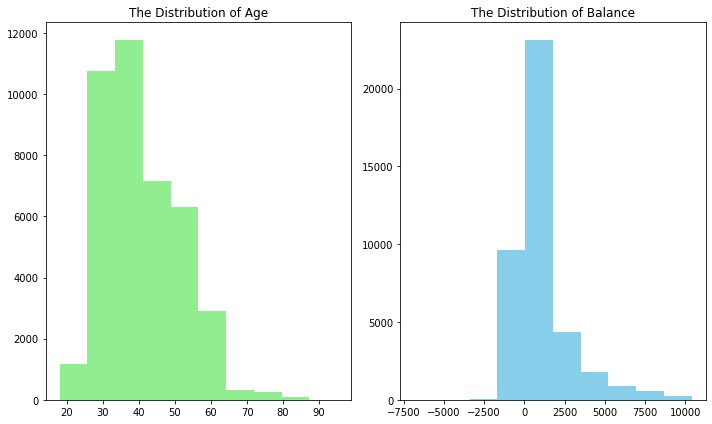

In [ ]:
# Visualizing distribution of 'age' and 'balance'
dist_age_balance = plt.figure(figsize = (10,6))

ax1 = dist_age_balance.add_subplot(1,2,1) 
ax2 = dist_age_balance.add_subplot(1,2,2)

ax1.hist(df5['age'], color = 'lightgreen')
ax1.set_title('The Distribution of Age')

ax2.hist(df5['balance'], color = 'skyblue')
ax2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show() 

The **distribution of age** shows that the majority of the customers lie in the range of 30-50 years. The standard deviation of the dataset is fairly small and the data is almost normally distributed.

The **distribution of balance** shows the varibality of the data as it ranges from -6847 to 10399, after we have removed the outliers. The standard deviation for the data is also quite high at 1708.

In [ ]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000
mean,40.770840,1071.247548,15.866909,4.311098,2.772094,32.286561,0.436908,0.113670
std,10.468806,1708.372387,8.313072,4.308268,3.102816,90.808529,1.573430,0.317414
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,420.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1330.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,10399.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


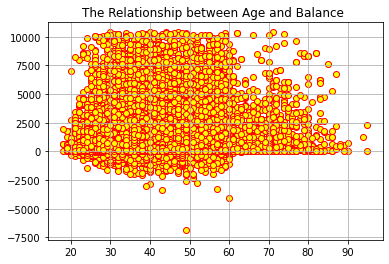

In [ ]:
# Visulizing relationship between age and balance

plt.figsize = (7,5)
plt.scatter(df5['age'],df5['balance'],c='yellow',edgecolor='red')
plt.grid(True)

plt.title('The Relationship between Age and Balance ')
plt.show()

The plot shows that there is no clear relationship between age and balance. However, we may note that **customers above 60 years tend to have a balance <5000**.

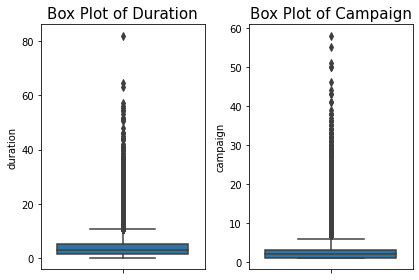

In [ ]:
# Visualizing the distribution of duration and campaign

fig, axes = plt.subplots(1, 2)

sns.boxplot(y=df5['duration'],ax=axes[0])
sns.boxplot(y=df5['campaign'],ax=axes[1])

axes[0].set_title('Box Plot of Duration',size=15)
axes[1].set_title('Box Plot of Campaign',size=15)

plt.tight_layout()
plt.show()

The box plot of **duration** shows that most of the calls have been between 1.73 to 5.3 minutes. There are also quite a number of outliers exceeding 10 minutes. This might be an indication of interest shown by the customers in such cases.

The box plot of **campaign** iterates the fact that most customers have been contacted 1-2 times. However, even in this case, outliers exist which are as high as 58. This might be a special case.

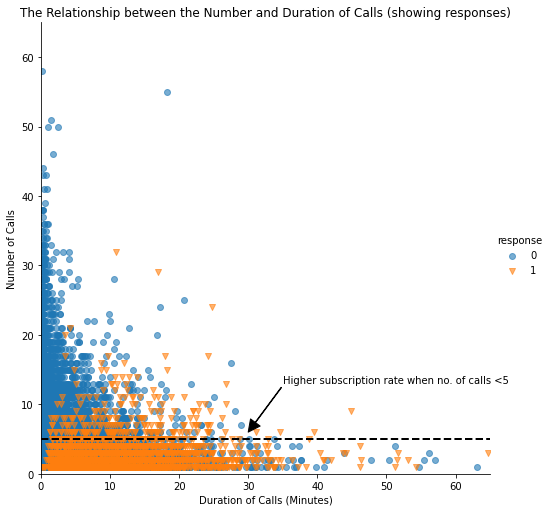

In [ ]:
# Visualizing the relationship between duration, number of calls and response
dur_cam = sns.lmplot(x='duration', y='campaign',data = df5,
                     hue = 'response',markers =['o', 'v'],
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (showing responses)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when no. of calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=0.5),xy=(30,6))
plt.show()

The postive responses (marked in orange) show a **higher percentage when number of calls are lesser than 5**. High number of calls mostly receive a negative response. Hence, the bank should not try and contact a customer repeatedly as it has little positive outcome and adds to the customers irritation.

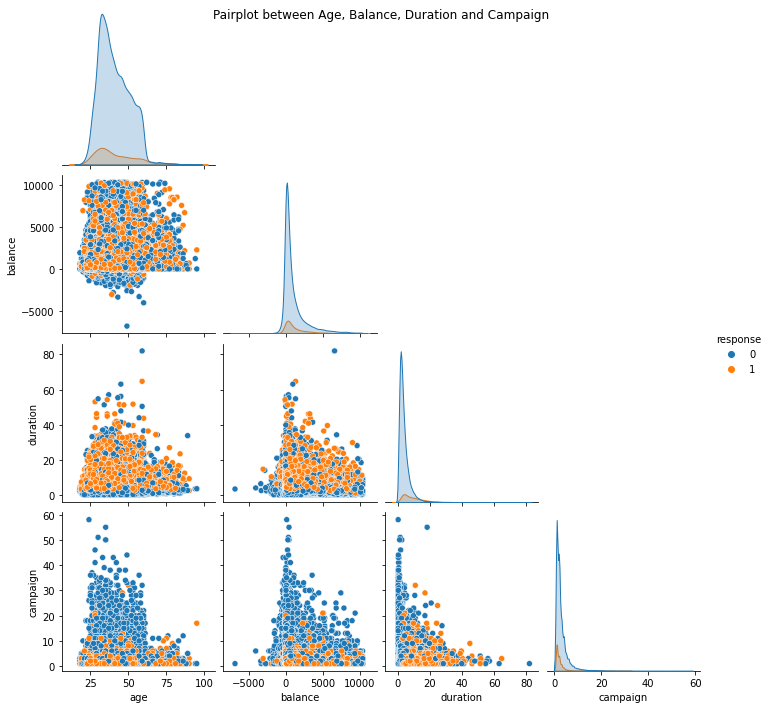

In [ ]:
# Plotting a pairplot between age, balance, duration and campaign
sns.pairplot(df5,x_vars=['age','balance','duration','campaign'], y_vars= ['age','balance','duration','campaign'], hue='response',corner=True)
plt.suptitle('Pairplot between Age, Balance, Duration and Campaign')

plt.show()

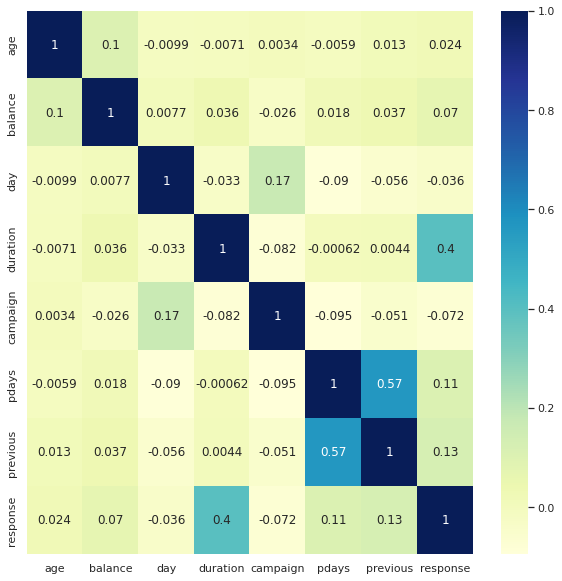

In [ ]:
# Plotting the heatmap for the variables

sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)
plt.show()

The pairplot does not bring out any significant trends with regards to a positive outcome of the campaign. For most of the variables, the positive outcome is fairly evenly spread out. However, only **lower number of calls** in previous campaigns ('campaign' variable) show a higher positive outcome.

From the heatmap of the variables, it is evident that only **duration** has a significant correlation with response.

### 5. Data Visualization

In [ ]:
# Visualizing the response with respect to age and percentage contacted
df_temp = df5.copy()
df_temp.loc[df_temp["age"] < 30,  'age_group'] = 20
df_temp.loc[(df_temp["age"] >= 30) & (df_temp["age"] <= 39), 'age_group'] = 30
df_temp.loc[(df_temp["age"] >= 40) & (df_temp["age"] <= 49), 'age_group'] = 40
df_temp.loc[(df_temp["age"] >= 50) & (df_temp["age"] <= 59), 'age_group'] = 50
df_temp.loc[df_temp["age"] >= 60, 'age_group'] = 60
df_temp.sample(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age_group
3171,41,management,married,tertiary,no,1132,no,no,15,5,1.58,4,-1,0,unknown,0,40.0
33380,50,blue-collar,divorced,secondary,no,-1,yes,no,20,4,2.52,1,-1,0,unknown,0,50.0
22210,32,technician,single,tertiary,no,0,no,no,21,8,11.00,2,-1,0,unknown,0,30.0
40825,26,admin.,single,secondary,no,96,no,no,11,8,5.82,1,70,3,failure,1,20.0
14469,36,blue-collar,married,primary,no,1580,yes,no,14,7,10.25,3,-1,0,unknown,0,30.0
15856,45,blue-collar,married,primary,no,0,yes,no,21,7,1.35,4,-1,0,unknown,0,40.0
29768,39,services,married,secondary,no,105,no,no,4,2,2.28,1,189,2,failure,0,30.0
33412,34,management,divorced,tertiary,no,471,no,no,20,4,4.12,1,332,4,failure,0,30.0
19713,54,services,married,primary,no,1059,no,no,7,8,2.45,3,-1,0,unknown,0,50.0
43724,35,technician,married,secondary,no,18,yes,yes,14,5,1.03,2,-1,0,unknown,0,30.0


In [ ]:
count_age_response_pct = pd.crosstab(df_temp['response'],df_temp['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()
count_age_response_pct.columns=count_age_response_pct.columns.astype(str)
count_age_response_pct.rename(columns = {'0':'No', '1':'Yes'}, inplace = True) 
count_age_response_pct

response,No,Yes
age_group,,
20.0,83.009298,16.990702
30.0,89.646617,10.353383
40.0,91.156268,8.843732
50.0,90.822615,9.177385
60.0,66.305085,33.694915


In [ ]:
age = pd.DataFrame(df_temp['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['Yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
age

,% Contacted,% Subscription,age
20.0,11.632538,16.990702,20
30.0,40.625384,10.353383,30
40.0,25.767595,8.843732,40
50.0,18.348534,9.177385,50
60.0,3.625950,33.694915,60


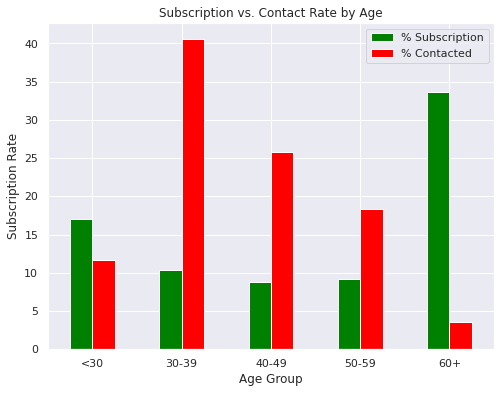

In [ ]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [ ]:

df_temp.loc[df_temp["balance"] <= 0,  'balance_group'] = 'no balance'
df_temp.loc[(df_temp["balance"] > 0) & (df_temp["balance"] <= 1000), 'balance_group'] = 'low balance'
df_temp.loc[(df_temp["balance"] > 1000) & (df_temp["balance"] <= 5000), 'balance_group'] = 'average balance'
df_temp.loc[(df_temp["balance"] > 5000), 'balance_group'] = 'high balance'
df_temp.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0,50.0,average balance
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0,40.0,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0,30.0,low balance
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0,30.0,low balance
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0,20.0,low balance


In [ ]:
count_balance_response_pct = pd.crosstab(df_temp['response'],df_temp['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()
count_balance_response_pct.columns=count_balance_response_pct.columns.astype(str)
count_balance_response_pct.rename(columns={'0':'No', '1':'Yes'},inplace=True)
count_balance_response_pct

response,No,Yes
balance_group,,
average balance,85.208041,14.791959
high balance,84.947368,15.052632
low balance,89.263444,10.736556
no balance,93.101406,6.898594


In [ ]:
bal = pd.DataFrame(df_temp['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['Yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
bal

,% Contacted,% Subscription,bal
no balance,16.605620,6.898594,0
low balance,52.432459,10.736556,1
average balance,26.291207,14.791959,2
high balance,4.670715,15.052632,3


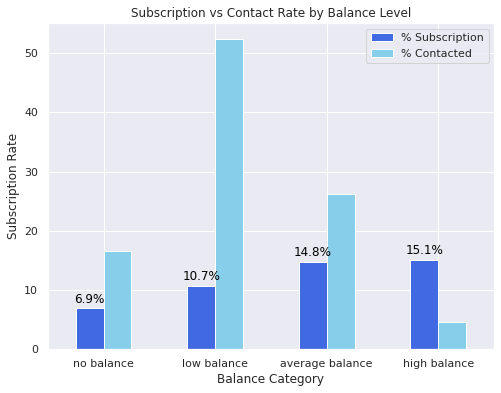

In [ ]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [ ]:
df_temp.rename(columns={'response':'response_binary'},inplace=True)

In [ ]:
df_temp.loc[df_temp['response_binary'] == 1,  'response'] = 'yes'
df_temp.loc[df_temp['response_binary'] == 0,  'response'] = 'no'

age_balance1 = pd.DataFrame(df_temp.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df_temp.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

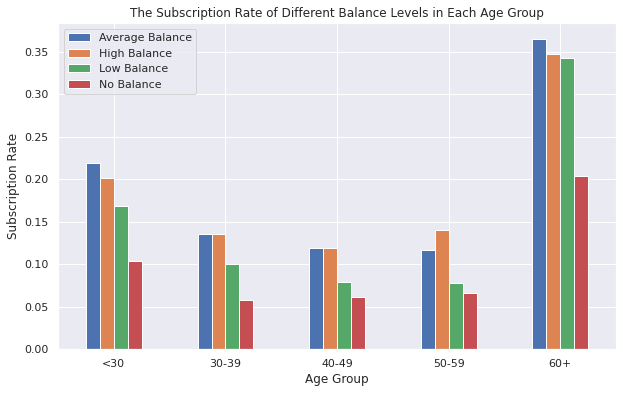

In [ ]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

In [ ]:
# Visualizing subscription rate by job
count_job_response_pct = pd.crosstab(df_temp['response'],df_temp['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

response,no,yes
job,,
admin.,88.034006,11.965994
blue-collar,92.763831,7.236169
entrepreneur,91.865672,8.134328
housemaid,91.209748,8.790252
management,86.863615,13.136385
retired,77.821782,22.178218
self-employed,88.773389,11.226611
services,91.265456,8.734544
student,70.537010,29.462990


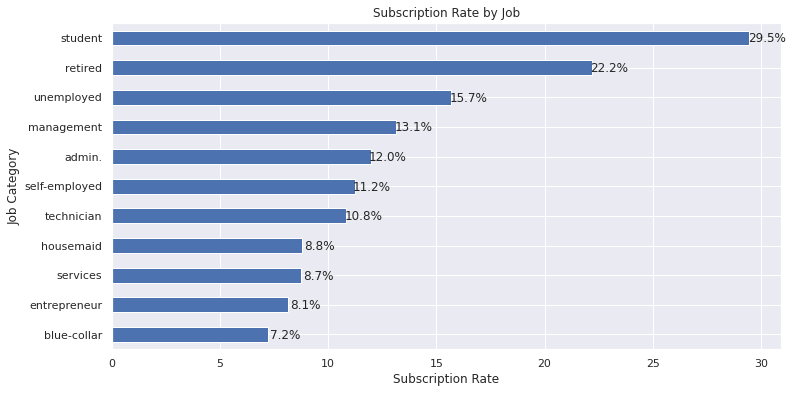

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                            figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [ ]:
# Visualizing subscription rate by month

count_month_response_pct = pd.crosstab(df_temp['response'],df_temp['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
count_month_response_pct

response,no,yes
month,,
1,89.778535,10.221465
10,54.757930,45.242070
11,89.838803,10.161197
12,54.335260,45.664740
2,82.784698,17.215302
3,45.544554,54.455446
4,80.411555,19.588445
5,93.395848,6.604152
6,89.829451,10.170549


In [ ]:

month = pd.DataFrame(df_temp['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

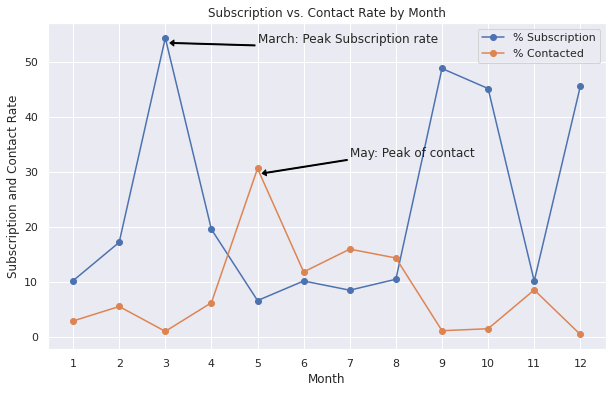

In [ ]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks,np.arange(1,13,1))

# Annotation: peak of contact
y = month['% Contacted'].max()
x = float(month['% Contacted'].idxmax())
plt.annotate('May: Peak of contact', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+4),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'), 
             horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = float(month['% Subscription'].idxmax())
plt.annotate('March: Peak Subscription rate', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+1), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'), 
             horizontalalignment='left', verticalalignment='top')

plt.show()

In [ ]:
df_temp.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary,age_group,balance_group,response
17397,55,technician,married,secondary,no,176,yes,no,28,7,1.77,2,-1,0,unknown,0,50.0,low balance,no
26123,33,admin.,married,secondary,no,353,yes,no,19,11,1.78,2,-1,0,unknown,0,30.0,low balance,no
18864,31,technician,single,tertiary,no,387,no,no,4,8,2.48,1,-1,0,unknown,0,30.0,low balance,no
36956,39,admin.,married,secondary,no,0,no,no,12,5,4.27,4,-1,0,unknown,0,30.0,no balance,no
23591,59,retired,married,secondary,no,82,no,no,28,8,5.13,6,-1,0,unknown,0,50.0,low balance,no


In [ ]:
x.dtype

AttributeError: ignored